<a href="https://colab.research.google.com/github/shubhamsolsi/Book_Recommendation_System/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 274– Recommendation system

##Business objective-

Our business objective revolves around providing personalized book recommendations to users based on their preferences, using the information extracted from the Book Crossing dataset. This dataset comprises three essential files: Books, Users, and Ratings.

**Books Dataset:** This dataset contains information about various books available in our system. It includes details such as book titles, authors, Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L  The books' attributes will serve as key factors in understanding their content and theme.

**Users Dataset:** In this dataset, we have information about the users,This includes user IDs, demographic information, and Age that help us understand their reading preferences and interests.

**Ratings Dataset:** The ratings dataset encompasses user ratings and reviews for different books. This information provides insights into how much a particular user liked or disliked a book. This data is valuable in determining user preferences and gauging the popularity of books.


##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

here's an issue with decoding the text data using the UTF-8 encoding,specifying the encoding Solve the problem.

In [ ]:
books_df=pd.read_csv('Books.csv',encoding='ISO-8859-1')
ratings_df=pd.read_csv('Ratings.csv')
users_df=pd.read_csv('Users.csv')

<ipython-input-3-bc95790cf247>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df=pd.read_csv('Books.csv',encoding='ISO-8859-1')


In [ ]:
books_df.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users_df.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Merge relevant information
##Assuming 'ISBN' is the common identifier between the Books & Ratings datasets
##Assuming 'User-ID' is the common identifier between the User & Merged datasets


In [ ]:
merged1_df=ratings_df.merge(books_df,on='ISBN')

In [ ]:
merged1_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
merged2_df=merged1_df.merge(users_df,on='User-ID')

In [ ]:
merged2_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0


##EDA
EDA, or Exploratory Data Analysis, is a crucial step in understanding the data before building a predictive model. It involves exploring the dataset, calculating summary statistics, visualizing the data, detecting seasonality, analyzing correlations, identifying outliers, handling missing data, and identifying opportunities for feature engineering. EDA helps gain insights, detect patterns, and make informed decisions based on the data.

In [ ]:
merged2_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
merged2_df.columns = merged2_df.columns.str.strip().str.lower().str.replace('-', '_')


In [ ]:
merged2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   isbn                 1031136 non-null  object 
 2   book_rating          1031136 non-null  int64  
 3   book_title           1031136 non-null  object 
 4   book_author          1031135 non-null  object 
 5   year_of_publication  1031136 non-null  object 
 6   publisher            1031134 non-null  object 
 7   location             1031136 non-null  object 
 8   age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


In [ ]:
merged2_df.describe()

,user_id,book_rating,age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [ ]:
pd.set_option('display.max_colwidth', -1)
merged2_df.info()


<ipython-input-14-7cc7b54f42e2>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   isbn                 1031136 non-null  object 
 2   book_rating          1031136 non-null  int64  
 3   book_title           1031136 non-null  object 
 4   book_author          1031135 non-null  object 
 5   year_of_publication  1031136 non-null  object 
 6   publisher            1031134 non-null  object 
 7   location             1031136 non-null  object 
 8   age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


In [ ]:
merged2_df.loc[(merged2_df['book_author'].isnull()),: ]

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
486486,98647,9627982032,8,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,"selayang, selangor, malaysia",26.0


In [ ]:
merged2_df.loc[(merged2_df['publisher'].isnull()),: ]

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
9777,98391,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,"morrow, georgia, usa",52.0
9786,98391,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,"morrow, georgia, usa",52.0


#Identify the mismatch data


In [ ]:
merged2_df['year_of_publication'].unique()

array([2002, 1986, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970, 1978,
       1993, 1989, 1995, 1990, 1992, 1950, 1991, 1999, 1954, 1988, 2003,
       2004, 2000, 1983, 1985, 1982, 1956, 1979, '2003', 1975, 0, 1976,
       1981, 1977, 1980, 1974, 1957, 1958, 1960, 1963, 1969, 1972, 1961,
       1971, 1953, 1968, 1973, 1967, 1962, 1937, 1959, '1998', '1981',
       '0', '1979', '1993', '1994', '1992', '1978', '1989', '1999',
       '1987', '1988', '1995', '1991', '1996', '2000', '1976', '2001',
       '2002', '1983', '1997', '1986', '1985', 1955, 1946, '2004', 2005,
       '1971', '1984', '1980', '1982', '1990', '1957', 1945, 1965, '1950',
       1964, '1964', '1970', '1969', '1960', '1956', '1977', '1973', 1927,
       2020, '1968', 2050, '1972', '1975', '1974', 1920, 1966, 1952,
       '1965', '1963', 1930, '1962', '1952', 1940, '1967', 1942, 1947,
       1925, '1966', 1948, '1958', 1923, 2030, 1951, 2021, 1941, 1932,
       '1961', 2011, '1951', 1901, 2038, '1940', 1929, 1943, 1936

In [ ]:
merged2_df['publisher'].unique()

array(['Ballantine Books', 'Tor Books', 'Vintage', ...,
       'Zimbabwe Pub. House', 'Wipf &amp; Stock Publishers',
       'C.F. MÃ¼ller'], dtype=object)

In [ ]:
merged2_df[merged2_df['year_of_publication'] == 'DK Publishing Inc']

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
85425,130571,0789466953,0,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,"summerville, south carolina, usa",NaN
346284,227771,078946697X,7,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,"savion, n/a, israel",19.0
594299,169663,078946697X,0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,"towson, maryland, usa",NaN


In [ ]:
merged2_df[merged2_df['year_of_publication'] == 'Gallimard']

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
402556,137190,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,"rennes, bretagne, france",31.0


In [ ]:
merged2_df.loc[85425]

user_id                130571                                                                                                     
isbn                   0789466953                                                                                                 
book_rating            0                                                                                                          
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author            2000                                                                                                       
year_of_publication    DK Publishing Inc                                                                                          
publisher              http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
location               summerville, south carolina, usa                            

In [ ]:
merged2_df.loc[346284]

user_id                227771                                                                                              
isbn                   078946697X                                                                                          
book_rating            7                                                                                                   
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author            2000                                                                                                
year_of_publication    DK Publishing Inc                                                                                   
publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
location               savion, n/a, israel                                                                                 
age     

In [ ]:
merged2_df.loc[594299]

user_id                169663                                                                                              
isbn                   078946697X                                                                                          
book_rating            0                                                                                                   
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author            2000                                                                                                
year_of_publication    DK Publishing Inc                                                                                   
publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
location               towson, maryland, usa                                                                               
age     

In [ ]:
merged2_df.loc[402556]

user_id                137190                                                                  
isbn                   2070426769                                                              
book_rating            0                                                                       
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
location               rennes, bretagne, france                                                
age                    31.0                                                                    
Name: 402556, dtype: object

#Treat the mismatch data

In [ ]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [ ]:
replace_df_value(merged2_df, 85425, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(merged2_df, 85425, 'book_author', 'Michael Teitelbaum')
replace_df_value(merged2_df, 85425, 'year_of_publication', 2000)
replace_df_value(merged2_df, 85425, 'publisher', 'DK Publishing Inc')

replace_df_value(merged2_df, 346284, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(merged2_df, 346284, 'book_author', 'James Buckley')
replace_df_value(merged2_df, 346284, 'year_of_publication', 2000)
replace_df_value(merged2_df, 346284, 'publisher', 'DK Publishing Inc')

replace_df_value(merged2_df, 594299, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(merged2_df, 594299, 'book_author', 'Michael Teitelbaum')
replace_df_value(merged2_df, 594299, 'year_of_publication', 2000)
replace_df_value(merged2_df, 594299, 'publisher', 'DK Publishing Inc')

replace_df_value(merged2_df, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(merged2_df, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(merged2_df, 220731, 'year_of_publication', 2003)
replace_df_value(merged2_df, 220731, 'publisher', 'Gallimard')



,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


In [ ]:
merged2_df.loc[85425]

user_id                130571                                                                        
isbn                   0789466953                                                                    
book_rating            0                                                                             
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
location               summerville, south carolina, usa                                              
age                    NaN                                                                           
Name: 85425, dtype: object

In [ ]:
merged2_df.loc[346284]

user_id                227771                                                                                    
isbn                   078946697X                                                                                
book_rating            7                                                                                         
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
location               savion, n/a, israel                                                                       
age                    19.0                                                             

In [ ]:
merged2_df.loc[594299]

user_id                169663                                                                        
isbn                   078946697X                                                                    
book_rating            0                                                                             
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
location               towson, maryland, usa                                                         
age                    NaN                                                                           
Name: 594299, dtype: object

In [ ]:
merged2_df.loc[402556]

user_id                137190                                                                  
isbn                   2070426769                                                              
book_rating            0                                                                       
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
location               rennes, bretagne, france                                                
age                    31.0                                                                    
Name: 402556, dtype: object

In [ ]:
replace_df_value(merged2_df, 402556,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(merged2_df, 402556, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(merged2_df, 402556, 'year_of_publication', 2003)
replace_df_value(merged2_df, 402556, 'publisher', 'Gallimard')

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslager Kislau,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories: And Other Holiday Stories,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


In [ ]:
merged2_df.loc[402556]

user_id                137190                               
isbn                   2070426769                           
book_rating            0                                    
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
location               rennes, bretagne, france             
age                    31.0                                 
Name: 402556, dtype: object

In [ ]:
merged2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   isbn                 1031136 non-null  object 
 2   book_rating          1031136 non-null  int64  
 3   book_title           1031136 non-null  object 
 4   book_author          1031135 non-null  object 
 5   year_of_publication  1031136 non-null  object 
 6   publisher            1031134 non-null  object 
 7   location             1031136 non-null  object 
 8   age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


In [ ]:
merged2_df.isnull().sum()

user_id                0     
isbn                   0     
book_rating            0     
book_title             0     
book_author            1     
year_of_publication    0     
publisher              2     
location               0     
age                    277835
dtype: int64

#Loading and Cleaning Data

Book-Author' and 'Publisher', we might consider replacing missing values with a default or placeholder value like "Unknown" or "Not Available."

In [ ]:
merged2_df.loc[(merged2_df['publisher'].isnull()),: ]

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
9777,98391,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,"morrow, georgia, usa",52.0
9786,98391,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,"morrow, georgia, usa",52.0


In [ ]:
merged2_df['publisher'].fillna('Not Available',inplace=True)

In [ ]:
merged2_df.isnull().sum()

user_id                0     
isbn                   0     
book_rating            0     
book_title             0     
book_author            1     
year_of_publication    0     
publisher              0     
location               0     
age                    277835
dtype: int64

In [ ]:
merged2_df['book_author'].fillna('Not Available',inplace=True)

In [ ]:
merged2_df.isnull().sum()

user_id                0     
isbn                   0     
book_rating            0     
book_title             0     
book_author            0     
year_of_publication    0     
publisher              0     
location               0     
age                    277835
dtype: int64

#Imputing missing age values with the median or mean age, which can help avoid bias introduced by large numbers of missing values.

In [ ]:
merged2_df['age'].unique()

array([ nan,  23.,  34.,   2.,  45.,  24.,  36.,  35.,  51.,  39.,  52.,
        72.,  30.,  46.,  41.,  33.,  29.,  21.,  38.,  63.,  26.,  59.,
        44.,   1.,  25.,  54.,  27.,  28.,  16.,  20.,  17.,  56.,  32.,
        61.,  53.,  31.,  40.,  37.,  43.,  50.,  15.,  19., 201.,  49.,
        47.,  60.,  69.,  42.,  22.,  18.,  64.,  58.,  68.,  48.,  14.,
        62.,  71.,  57., 204., 209.,   9.,  67.,  55.,   0., 101.,  66.,
       116.,  13.,  75.,  70., 103., 220.,  65.,  83.,  11.,  10.,  12.,
         8.,  76., 200.,  73.,  92.,  80.,  79., 223.,  90., 100.,   7.,
        74.,   3.,  77., 104.,  85.,  82., 128.,  81., 140., 152.,  84.,
       239.,  78., 148.,  97.,   5., 168.,   4., 151., 147., 136., 228.,
        99.,  98.,  93.,  94., 114., 157., 133., 141., 108.,  86., 237.,
        96., 146., 212., 219., 124., 229.,  89., 226.,   6., 244., 105.,
       199., 123., 118., 156., 138.,  95., 132., 127., 109., 107.])

#Convert 'age' to numeric

In [ ]:
merged2_df['age']=pd.to_numeric(merged2_df['age'],errors='coerce')

In [ ]:
merged2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   isbn                 1031136 non-null  object 
 2   book_rating          1031136 non-null  int64  
 3   book_title           1031136 non-null  object 
 4   book_author          1031136 non-null  object 
 5   year_of_publication  1031136 non-null  object 
 6   publisher            1031136 non-null  object 
 7   location             1031136 non-null  object 
 8   age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


In [ ]:
from numpy.core.fromnumeric import mean
mean=merged2_df['age'].mean()

In [ ]:
print(mean)

37.39764848314286


In [ ]:
merged2_df['age'].fillna((merged2_df['age'].mean()), inplace=True)

In [ ]:
merged2_df['age'].isnull().sum()

0

In [ ]:
merged2_df.isnull().sum()

user_id                0
isbn                   0
book_rating            0
book_title             0
book_author            0
year_of_publication    0
publisher              0
location               0
age                    0
dtype: int64

In [ ]:
merged2_df['age'].unique()

array([ 37.39764848,  23.        ,  34.        ,   2.        ,
        45.        ,  24.        ,  36.        ,  35.        ,
        51.        ,  39.        ,  52.        ,  72.        ,
        30.        ,  46.        ,  41.        ,  33.        ,
        29.        ,  21.        ,  38.        ,  63.        ,
        26.        ,  59.        ,  44.        ,   1.        ,
        25.        ,  54.        ,  27.        ,  28.        ,
        16.        ,  20.        ,  17.        ,  56.        ,
        32.        ,  61.        ,  53.        ,  31.        ,
        40.        ,  37.        ,  43.        ,  50.        ,
        15.        ,  19.        , 201.        ,  49.        ,
        47.        ,  60.        ,  69.        ,  42.        ,
        22.        ,  18.        ,  64.        ,  58.        ,
        68.        ,  48.        ,  14.        ,  62.        ,
        71.        ,  57.        , 204.        , 209.        ,
         9.        ,  67.        ,  55.        ,   0.  

In [ ]:
merged2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   isbn                 1031136 non-null  object 
 2   book_rating          1031136 non-null  int64  
 3   book_title           1031136 non-null  object 
 4   book_author          1031136 non-null  object 
 5   year_of_publication  1031136 non-null  object 
 6   publisher            1031136 non-null  object 
 7   location             1031136 non-null  object 
 8   age                  1031136 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


##Convert 'Year-Of-Publication' to numeric

In [ ]:
merged2_df['year_of_publication']=pd.to_numeric(merged2_df['year_of_publication'],errors='coerce')

In [ ]:
merged2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031136 non-null  int64  
 1   isbn                 1031136 non-null  object 
 2   book_rating          1031136 non-null  int64  
 3   book_title           1031136 non-null  object 
 4   book_author          1031136 non-null  object 
 5   year_of_publication  1031136 non-null  int64  
 6   publisher            1031136 non-null  object 
 7   location             1031136 non-null  object 
 8   age                  1031136 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 78.7+ MB


#Data Visualizations

presentation no. 1 -

Which are the top Author with number of books ?

Text(0.5, 1.0, 'Top 20 author with number of books')

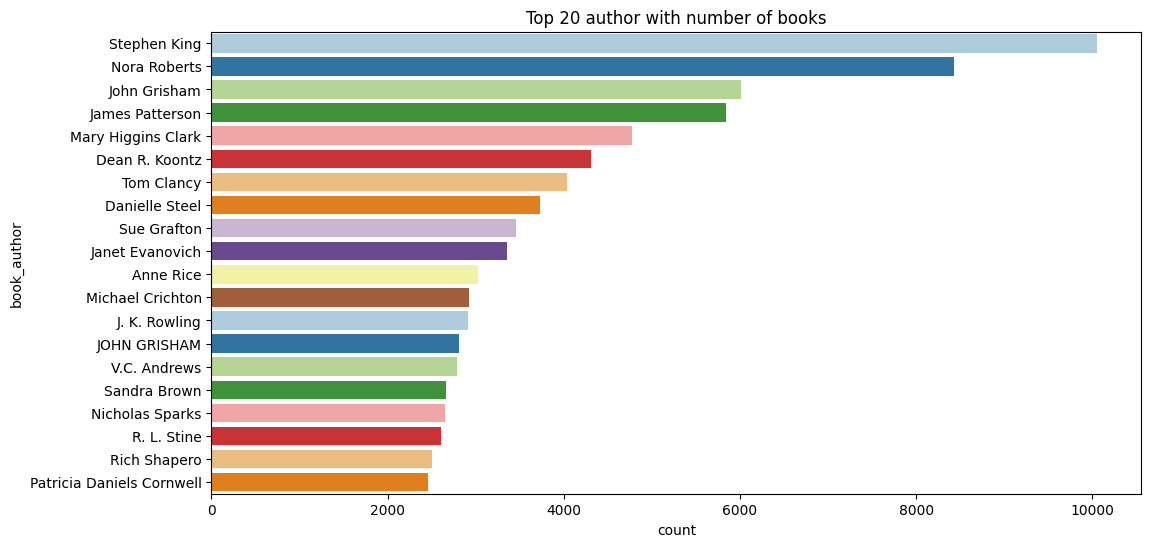

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=merged2_df,order=merged2_df['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Hypotheses regarding authors' success: Agatha Christie's prolific book count doesn't guarantee her as the best; quality matters. Shakespeare's fame stems from influential works despite fewer books. Other authors might have fewer books yet boast best sellers with millions sold, illustrating diverse paths to literary acclaim. Book quantity alone doesn't define greatness; impact, innovation, and readers' resonance shape an author's legacy.

presentation no.2 -

Which are top publishers with published books ?

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

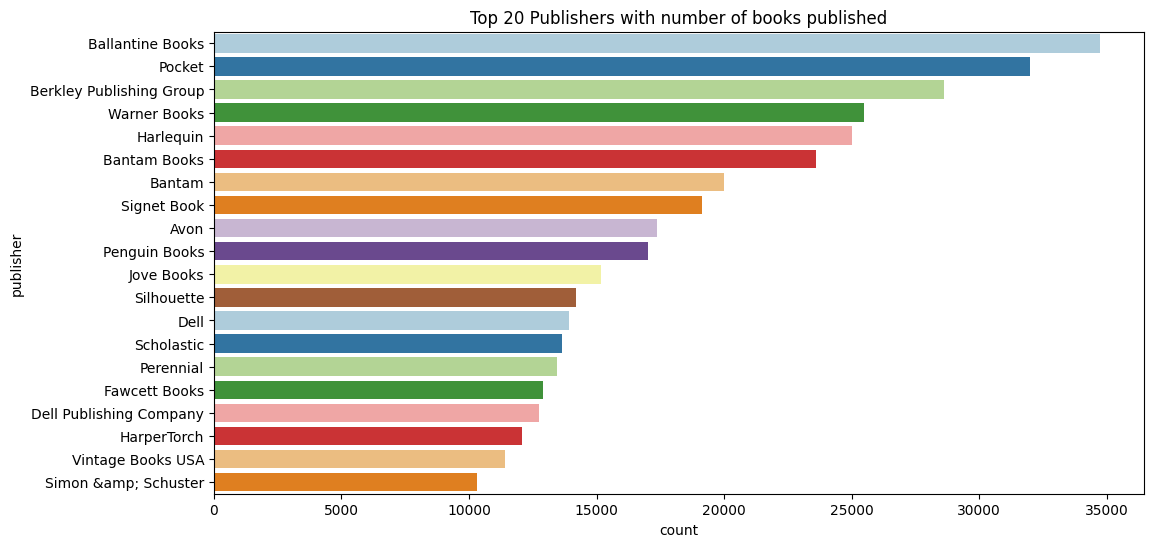

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=merged2_df,order=merged2_df['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Analysis of publishing dynamics: Harlequin's substantial book count suggests appeal to top authors; further exploration needed. Its potential outperformance might stem from effective strategies, while competition with Penguin Books, Warner Books, Penguin USA, and Berkley Publishing Group indicates a vibrant industry. Penguin Books' fewer titles might reflect a focus on quality authors, boosting its reputation. Validation requires examining sales, author profiles, and reader response to unravel the interplay between publishers, authors, and audience preferences.

presentation no.3 -

Number of Books published in yearly.

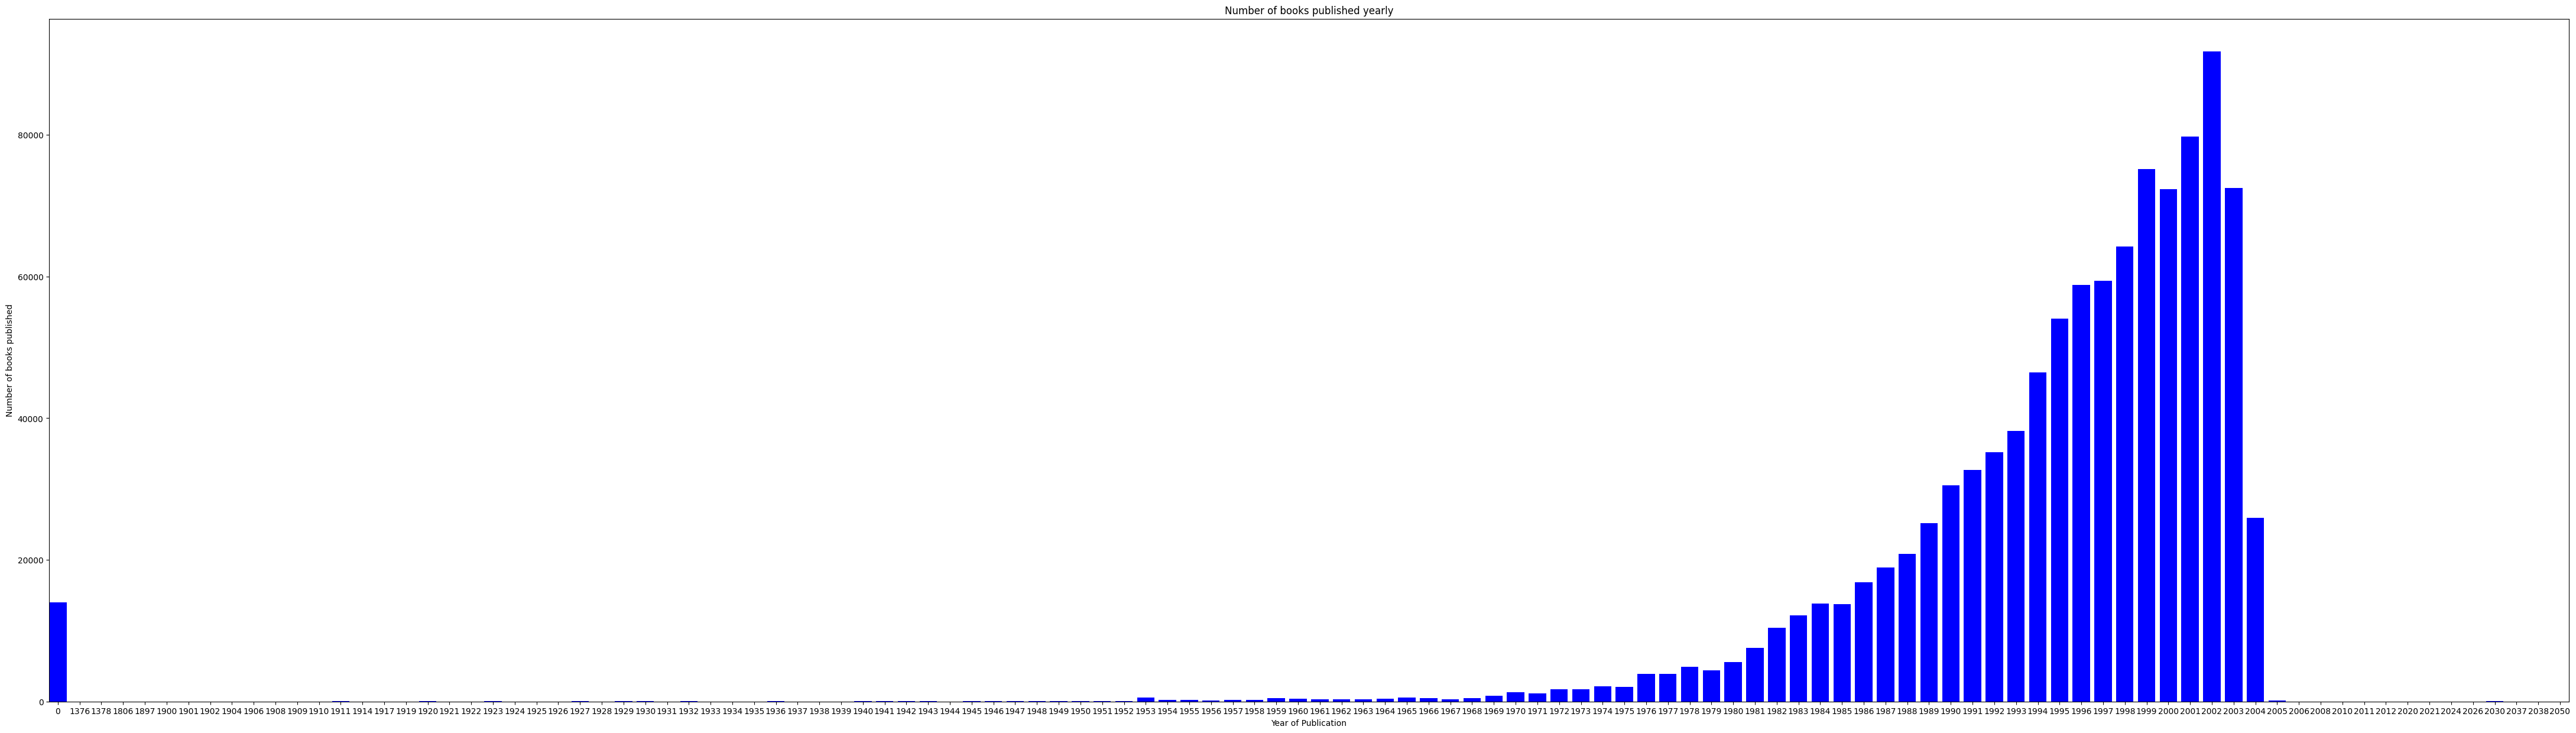

In [ ]:
publications = {}
for year in merged2_df['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [ ]:
merged2_df.year_of_publication = pd.to_numeric(merged2_df.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = merged2_df[merged2_df.year_of_publication == 0].year_of_publication.count()
nan_year = merged2_df.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
merged2_df.year_of_publication.replace(0, np.nan, inplace=True)

There are 14009 entries as '0', and 0 NaN entries in the Year of Publication field


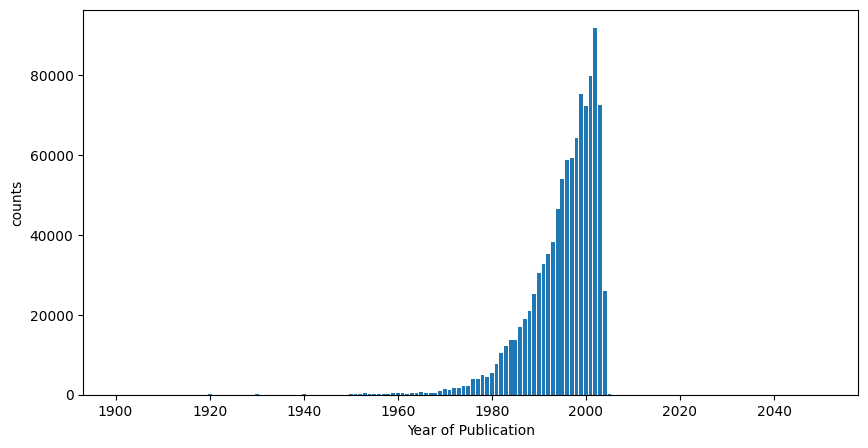

In [ ]:
year = merged2_df.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size':10})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

Book publication trends from 1950 to 2005 reveal intriguing hypotheses: rising publication could signal a growing recognition of books' role in fostering productivity. The gradual emergence of diverse subjects from the late 1940s to 1970 suggests authors catering to evolving reader tastes. In the 1970s to mid-1990s, as subjects diversified, book recommendations likely gained traction, aligning with readers' preferences. The peak engagement observed between 1995 and 2001 signifies a strong connection between authors' choices and reader interests. Analyzing historical data, genre shifts, and marketing strategies can illuminate the complex interplay between societal shifts, author decisions, and reader engagement in shaping the book landscape.

presenatation no.4 -

Age distributions

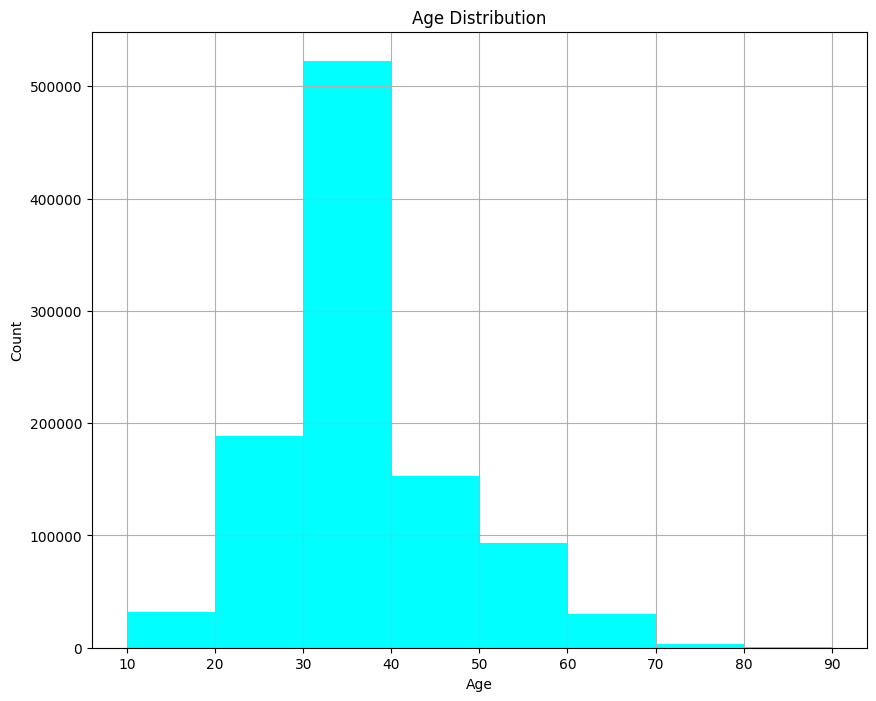

In [ ]:
plt.figure(figsize=(10,8))
merged2_df.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

User age preferences for books reveal intriguing trends. High engagement among ages 30-40 and 20-30 could be due to subject alignment and relatability. Authors catering to these life stages might foster strong connections. Interestingly, ages 10-20 and 50-60 also share engagement levels, possibly indicating intergenerational appeal or universal themes. Investigating content relevance, marketing strategies, and cross-generational reading habits can unveil the dynamics behind these patterns.

presenatation No. 5

What are top 20 books as per number of ratings ?

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

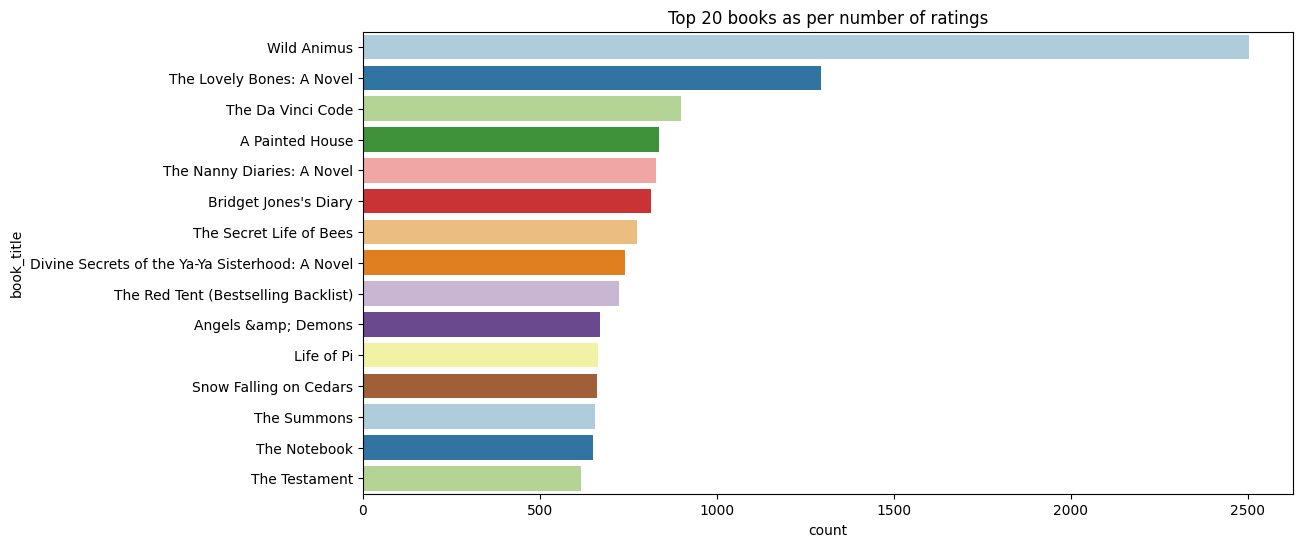

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= merged2_df, order=merged2_df['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

Selected Poems" and "Little Women" receive top ratings, indicating reader favor. "The Secret Garden," "Dracula," and "Adventures of Huckleberry Finn" compete intensely, likely due to differing audience tastes. Similarly, "Masquerade," "Black Beauty," and "Frankenstein" face a competitive struggle, possibly due to genre or era challenges. Analyzing genres, historical contexts, and writing styles can clarify rating variations. Understanding reader preferences illuminates book reception.

<Axes: xlabel='book_rating', ylabel='count'>

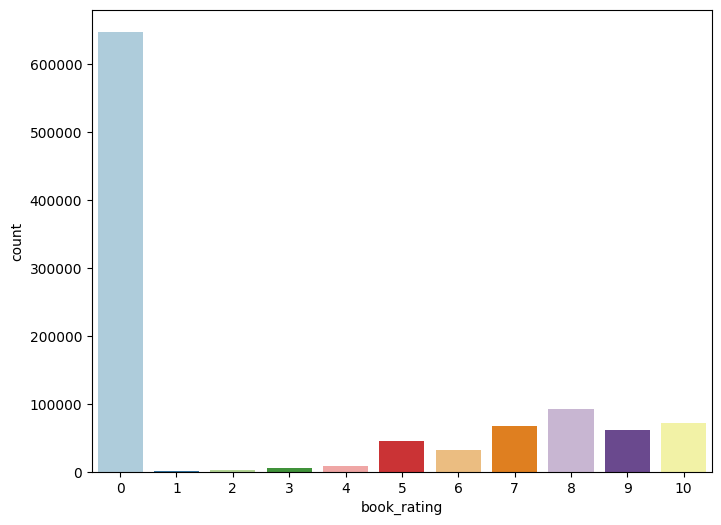

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= merged2_df)

The countplot reveals prominent implicit ratings (0), suggesting many users haven't formally rated books. Recognizable patterns emerge within explicit ratings (1-10), reflecting diverse perceptions of book quality. Notably, a prevalence of ratings at 8 signifies a common choice, possibly indicating positive yet moderately enthusiastic feedback. Deeper exploration of factors influencing implicit ratings and patterns within explicit ratings can illuminate user engagement, preferences, and overall satisfaction. Consideration of book attributes, genres, and user demographics can enrich these hypotheses, offering insights into the complex interplay between readers and their book ratings.

# Explicit Ratings

Text(0.5, 1.0, 'Explicit Ratings')

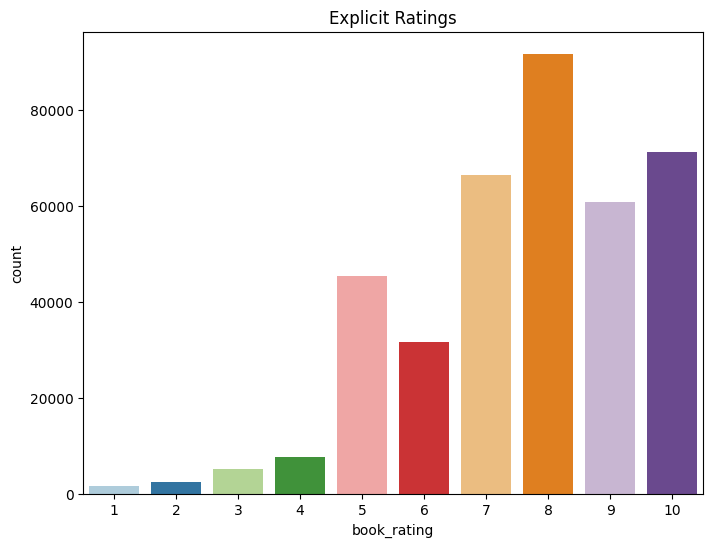

In [ ]:
plt.figure(figsize=(8,6))
rate_data = merged2_df[merged2_df['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

The countplot indicates higher user ratings, with 8 being the most frequent. For ratings 1-4, negative impacts could stem from language issues, offensive content, or dislike of the book. Rating 5 might indicate uncertainty in its impact. Ratings 6-10 reflect positive feedback. Users may assign 8 for books that aren't perfect but satisfactory. The rarity of 6 could be due to its lower position. Ratings 7 and 8 are average but common, while 9 and 10 are top positive ratings. Assessing language, content, and user sentiments can offer insights into rating distribution and its implications on book perception and publication success.

# Recommendation System

Now, let's move on to building a recommendation system based on popularity, which relies on ratings. These recommendations are typically provided to every user, regardless of their individual characteristics.

In [ ]:
ratings_explicit= merged2_df[merged2_df['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= merged2_df[merged2_df['book_rating'] == 0]   # implicit ratings represented by 0

In [ ]:
ratings_explicit.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986.0,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994.0,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996.0,HarperCollins,"cincinnati, ohio, usa",23.0
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998.0,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0


In [ ]:
print(merged2_df.shape)
print(ratings_explicit.shape)

(1031136, 9)
(383842, 9)


#Let's take top 10 recommendation books

In [ ]:
top_ten_books= pd.DataFrame(merged2_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723


The list above consists of the top 10 book recommendations based on ratings. However, these recommendations are not generated by a recommendation system; rather, they are simply the top 10 books with the highest ratings.

#Memory-Based Collaborative Filtering

This approach uses the memory of previous users interactions to compute users similarities based on items they've interacted (user-based approach) or compute items similarities based on the users that have interacted with them (item-based approach).

Train - Test Split

In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(merged2_df, test_size=0.20)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 824908
Testing set lengths: 206228
Test set is 20% of the full dataset.


In [ ]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.isbn.unique()
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [ ]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.isbn.unique()
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to three feature of dataframe
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [ ]:
train_data.sample(5)

,u_unique,i_unique,book_rating
908238,3462,185448,0
603046,1388,67777,8
125667,76,193627,0
311182,211,9021,0
326548,2386,117727,0


In [ ]:
test_data.sample(5)

,u_unique,i_unique,book_rating
60985,33,3194,0
139268,98,26218,0
258330,4408,11785,0
632772,17413,77488,8
487845,678,66132,0


#User-Item for Train Data

In [ ]:
# first I'll create an empty matrix of users books and then I'll add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # entry[1] is the user-id, entry[2] is the book-isbn and -1 is to counter 0-based indexing

In [ ]:
train_matrix.shape

(81320, 239101)

## User-Item for Test Data

In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [ ]:
test_matrix.shape

(37136, 99233)

#Cosine Similarity Based Recommendation System

In recommender systems, a frequently employed distance metric is cosine similarity. This method treats ratings as vectors within an n-dimensional space and determines similarity by assessing the angle between these vectors.

In [ ]:
# To make item-item similarity we need to take the transpose of the matrix
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [ ]:
# function to predict the similarity :
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)

        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

#Evaluation Metric

In [ ]:
# Evaluation metric by mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.9716977835689224
User-based CF RMSE: 7.971356771714564


By cosine similarity in recommendation system it gives 7.94 RMSE score.

We can make improvement in this score by using another method. Let's use Single Value Decomposition model (SVD) model to implement

Let's go through Model based approach by SVD model

In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811601 sha256=166af1252486169be68799dacb3edf950cd1e3b1dda1106f803f707334b32012
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset


In [ ]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit[['user_id','isbn','book_rating']], reader)

In [ ]:
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6411  1.6412  1.6378  1.6295  1.6351  1.6369  0.0044  
Fit time          6.97    7.48    8.15    7.20    6.77    7.31    0.48    
Test time         0.91    0.82    0.64    1.05    0.84    0.85    0.13    
CPU times: user 47.9 s, sys: 560 ms, total: 48.5 s
Wall time: 50 s


{'test_rmse': array([1.64113665, 1.64119171, 1.63778343, 1.6294733 , 1.6350856 ]),
 'fit_time': (6.969462871551514,
  7.479461669921875,
  8.148518085479736,
  7.196005582809448,
  6.768899202346802),
 'test_time': (0.9148740768432617,
  0.8213248252868652,
  0.6429252624511719,
  1.0518100261688232,
  0.8355176448822021)}

#Train - Test Split

In [ ]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

#Evaluation metrics for SVD model

In [ ]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.6312
The accuracy is 1.6311710524600609


The RMSE score is better now with 1.63

Testing Results

In [ ]:
# to test result let's take an user-id and item-id to test our model.
uid = 276744
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.13   {'was_impossible': False}


Now let's display estimated rating and real rating

In [ ]:
# display estimated rating and real rating
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) &
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.13.

The real rating given for this was 7.00.


In [ ]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# prediciton on teset and getting top predictions
pred = model.test(testset)
top_n = get_top_n(pred)

In [ ]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,51373,0394586603,8.0,8.175644,{'was_impossible': False}
1,235085,0070530157,5.0,6.903562,{'was_impossible': False}
2,11676,1840183713,8.0,7.882744,{'was_impossible': False}
3,181687,0312986343,7.0,7.214700,{'was_impossible': False}
4,173355,0156027178,7.0,7.747018,{'was_impossible': False}
...,...,...,...,...,...
76764,145753,0553575066,8.0,6.554082,{'was_impossible': False}
76765,18401,0380790076,9.0,8.042909,{'was_impossible': False}
76766,198012,046508348X,9.0,7.276998,{'was_impossible': False}
76767,147451,0449210774,7.0,7.332067,{'was_impossible': False}


We can view predictions from testset that we performed with SVD model.

Retrieving full book titles from full 'books_users_ratings' dataframe

In [ ]:
def get_reading_list(userid):

    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = merged2_df.loc[merged2_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [ ]:
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Attack Of The Deranged Mutant Killer Snow Goons: 8.914921921568288
The No. 1 Ladies' Detective Agency (Today Show Book Club #8): 7.775614634802605
Chaos: Making a New Science: 7.73844030427512
Full Spectrum 3: 7.724642139333637
Mr. Darwin's Shooter: 7.722394963464445
October Light: 7.722394963464445
Elementary Linear Algebra: 7.722394963464445
Calculus: Early Transcendental Functions: 7.722394963464445
Daniel Martin: 7.722394963464445
Discrete Multivariate Analysis: Theory and Practice: 7.722394963464445


As we can observe above we've got top recommendation of books and ratings with respective to it. So this was my recommendation system for BOOK RECOMMENDATION SYSTEM.

#Conclusion

Agatha Christie holds the highest number of books among the top 20 authors, with over 600 counts, followed by William Shakespeare.

Harlequin leads in the number of published books, followed by Silhouette.

Books are mainly published between 1950 and 2005.

Readers between 30-40 years show the highest preference for books, followed by those in the 20-30 age range.

"Selected Poems" receives the highest rating, closely followed by "Little Women". Many users have given a rating of 0, indicating they haven't rated any books.

The top 10 book recommendations based on ratings include "The Lovely Bones: A Novel" with 707 ratings. However, these recommendations are based on ratings rather than a recommendation system.

Using cosine similarity yields an RMSE score of 7.94, while the SVD model improves the score to 1.63.

SVD proves to be the best model, with the lowest RMSE score across all datasets.

The model-based approach results in the identification of the top 10 recommended books and their ratings.



In [ ]:
!apt-get -qq install git

In [19]:
%cd /content/drive/MyDrive/Book_Recommendation_System

/content/drive/MyDrive/Book_Recommendation_System


In [20]:
!git init
!git add .
!git commit -m "Initial commit"

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Book_Recommendation_System/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@f794d15d1cf8.(none)')


In [24]:
!git remote add origin https://github.com/shubhamsolsi/Book_Recommendation_System.git

In [25]:
!git branch -M main

In [28]:
!git branch

In [30]:
!git push -u origin

fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

